In [1]:
import matplotlib.pyplot as plt
from skimage.transform import rotate
from skimage.transform import hough_line, hough_line_peaks
from skimage.filters import sobel, laplace
import numpy as np
import math as mt
from scipy import misc, ndimage
from skimage import feature
%matplotlib inline

In [22]:
img = misc.imread('pos_41.png', mode='L')

/home/decioaguiar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


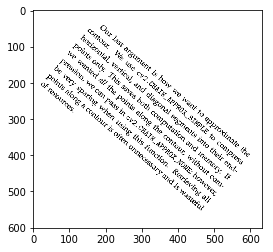

In [23]:
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
def retorna_coluna(out):
    maior_coluna = 0
    maior = out[0,0]
    for l in range(out.shape[0]):
        for c in range(out.shape[1]):        
            if maior < out[l,c]:
                maior = out[l,c]
                maior_coluna = c
    return maior_coluna

In [5]:
def hough_angle(img):
    img = 255 - img
    img_canny = feature.canny(img, sigma=3)
    out, angles, d = hough_line(img_canny)
    coluna = retorna_coluna(out)
    angulo = angles[coluna]
    angulo = np.rad2deg(angulo)
    if angulo < 0:
        return angulo + 90
    else: 
        return angulo - 90

In [6]:
int(hough_angle(img))

-6

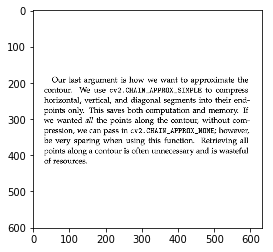

In [24]:
img_rot = rotate(img, 41, order=3, mode="edge")
plt.imshow(img_rot, cmap="gray")
plt.show()

In [8]:
def objetivo(img,theta):
    img_rot = rotate(img,theta)
    hist_rot = np.sum(img_rot, axis=-1)
    soma = 0
    for i in range(len(hist_rot)-1):
        soma += (hist_rot[i] - hist_rot[i+1])**2
    return soma

In [9]:
def proj_horizontal(img):
    img_canny = feature.canny(img, sigma=3)
    valor = []
    for theta in range(-90, 90, 1):
        valor.append((objetivo(img_canny, theta), theta))
    return max(valor)[1]

In [10]:
proj_horizontal(img)

-6

In [28]:
def exibir_entrada(img, img_col):
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title('Imagem Original')

    plt.subplot(1, 2, 2)
    plt.imshow(img_col, cmap="gray")
    plt.title('Imagem Rotacionada')

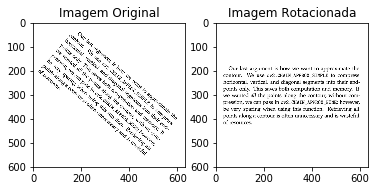

In [27]:
exibir_entrada(img, img_rot)